## Observations and Insights 

Of the 10 drug regimens analyzed, treatment with Ramicane appeared to be the most effective, resulting in the smallest tumor volume (40.21 on average) and the lowest variance (23.48). Capomulin drove the second best results with a 40.67 average tumor volume and 24.94 variance.

The average weight of mice treated with the two top performers, Ramicane and Capomulin, skewed heavier than mice treated with the other drug regimens. However, the R-squared value is 0.7088, indicating a strong correlation between weight and tumor volume. Further testing with segmentation by weight class is needed to determine if weight influences drug regimen performance.

Ramicane and Capomulin also had the highest numbers of Timepoints (228 & 230), in comparison to the other 8 drug regimens (which had Timepoints ranging from 156-188). The two top performers may have benefited from a higher volume of testing data acquired. Tighter controls on quantity of mice and quanity of timepoints may be needed in future trials.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# count # of rows in merged dataframe
mouse_study_complete["Mouse ID"].count()

1893

In [3]:
# count # of Mouse IDs
mouse_study_complete["Mouse ID"].value_counts()

g989    13
g791    10
w575    10
k894    10
q633    10
        ..
u153     1
t573     1
d133     1
h428     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# create a copy of merged dataframe to use for finding Mouse IDs with duplicate timepoints
mouse_study_dupes = mouse_study_complete.copy()
mouse_study_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# use .duplicated to find individual Mouse IDs that had duplicate timepoints
mouse_study_dupes = mouse_study_dupes[mouse_study_dupes.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mouse_study_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# count # of duplicate rows
mouse_study_dupes.count()

Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64

In [7]:
# create dataframe with .drop_duplicates that has the duplicate timepoints removed
mouse_study_cleaned = mouse_study_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
mouse_study_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# double-check cleaned dataframe has the same # of Mouse IDs
mouse_study_cleaned["Mouse ID"].value_counts()

g791    10
w575    10
k894    10
q633    10
t451    10
        ..
u153     1
t573     1
d133     1
h428     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# create dataframe with index set as Drug Regimen
drug_index = mouse_study_cleaned.set_index("Drug Regimen")
drug_index

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [11]:
# use groupby to find averages of Tumor Volume
drug_mean = drug_index.groupby("Drug Regimen").mean()
drug_mean

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.570513,27.076923,17.083333,52.393463,1.000000
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [12]:
# assign ave Tumor Volumes series to a variable
tumor_mean = drug_mean["Tumor Volume (mm3)"]
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# calculate Drug Regimen median
drug_median = drug_index.groupby("Drug Regimen").median()
drug_median

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,8.0,26.0,15.0,50.909965,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [14]:
# assign median Tumor Volumes series to a variable
tumor_median = drug_median["Tumor Volume (mm3)"]
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# calculate Drug Regimen variance
drug_variance = drug_index.groupby("Drug Regimen").var()
drug_variance

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,51.678867,2.845658,184.180108,43.138803,1.187097
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [16]:
# assign variance Tumor Volumes series to a variable
tumor_variance = drug_variance["Tumor Volume (mm3)"]
tumor_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# calculate Drug Regimen standard deviation
drug_std = drug_index.groupby("Drug Regimen").std()
drug_std

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.188801,1.686908,13.571297,6.568014,1.089540
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [18]:
# assign standard deviation Tumor Volumes series to a variable
tumor_std = drug_std["Tumor Volume (mm3)"]
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# calculate Drug Regimen SEM
drug_sem = drug_index.groupby("Drug Regimen").sem()
drug_sem

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.575565,0.135061,1.086573,0.525862,0.087233
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [20]:
# assign sem Tumor Volumes series to a variable
tumor_sem = drug_sem["Tumor Volume (mm3)"]
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# print dataframe with results
drug_summary_df = pd.DataFrame({
    "Tumor Volume - Mean": tumor_mean,
    "Tumor Volume - Median": tumor_median,
    "Tumor Volume - Variance": tumor_variance,
    "Tumor Volume - Standard Deviation": tumor_std,
    "Tumor Volume - SEM": tumor_sem  
})
drug_summary_df

,Tumor Volume - Mean,Tumor Volume - Median,Tumor Volume - Variance,Tumor Volume - Standard Deviation,Tumor Volume - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# find the averages of each metrics
agg_drug_mean = drug_summary_df["Tumor Volume - Mean"].mean()
agg_drug_median = drug_summary_df["Tumor Volume - Median"].mean()
agg_drug_variance = drug_summary_df["Tumor Volume - Variance"].mean()
agg_drug_std = drug_summary_df["Tumor Volume - Standard Deviation"].mean()
agg_drug_sem = drug_summary_df["Tumor Volume - SEM"].mean()

In [67]:
# Using the aggregation method, produce the same summary statistics in a single line

# print dataframe with results
agg_drug_summary_df = pd.DataFrame({ "Tumor Volume - Mean": agg_drug_mean,
    "Tumor Volume - Median": agg_drug_median,
    "Tumor Volume - Variance": agg_drug_variance,
    "Tumor Volume - Standard Deviation": agg_drug_std,
    "Tumor Volume - SEM": agg_drug_sem  
}, index=[0])
agg_drug_summary_df

,Tumor Volume - Mean,Tumor Volume - Median,Tumor Volume - Variance,Tumor Volume - Standard Deviation,Tumor Volume - SEM
0,50.983236,49.948493,47.787119,6.815695,0.500938


## Bar and Pie Charts

In [24]:
# use set_index to see full list of Timepoints per Drug Regimen
drug_index_timepoints = mouse_study_cleaned.set_index(["Drug Regimen"])["Timepoint"]
drug_index_timepoints

Drug Regimen
Ramicane     0
Ramicane     5
Ramicane    10
Ramicane    15
Ramicane    20
            ..
Naftisol    25
Naftisol    30
Naftisol    35
Naftisol    40
Naftisol    45
Name: Timepoint, Length: 1888, dtype: int64

In [25]:
# use groupby to see total Timepoints per Drug Regimen
timepoints_plot = drug_index_timepoints.groupby("Drug Regimen").count()
timepoints_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [26]:
# identify type for variable
type(timepoints_plot)

pandas.core.series.Series

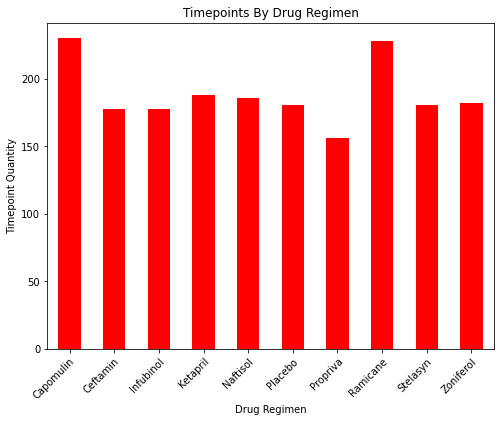

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Configure plot, figsize, title, and axis labels
bar_plot = timepoints_plot.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Timepoints By Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Timepoint Quantity")

# Configure x-tick rotation
xticklabels = timepoints_plot.index
bar_plot.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [28]:
# assign x and y axix
drugs = drug_summary_df.index
x_axis = np.arange(len(timepoints_plot))

(0.0, 250.0)

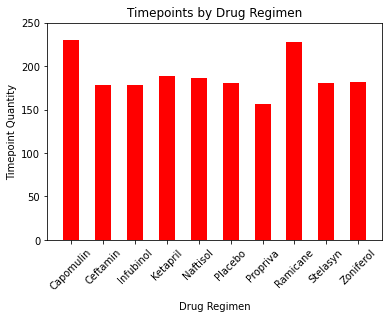

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs, timepoints_plot, color="r", width=0.5, align="center")
plt.title("Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen", labelpad=10)
plt.ylabel("Timepoint Quantity")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=45)

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(timepoints_plot)+20)

In [30]:
# count the # of mice per gender
mouse_study_cleaned["Sex"].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

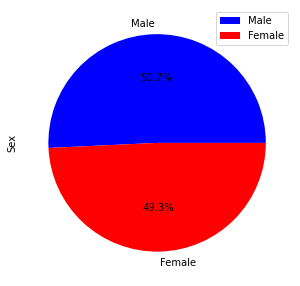

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = pd.DataFrame({'Sex':[958, 930]},                
                  index=['Male', 'Female'])
plot = sex_df.plot.pie(subplots=True, figsize=(5, 5), autopct = "%1.1f%%", colors = ['blue', 'red'])

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["blue", "red"]

Text(0.0, 1.0, 'Sex')

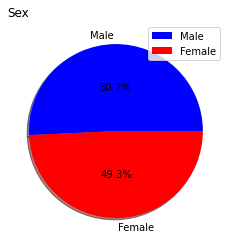

In [33]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, pctdistance=0.5)
plt.legend(loc="best")
plt.title('Sex', loc="left")

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# finaltumor_df = pd.DataFrame({})


# Start by getting the last (greatest) timepoint for each mouse

mouse_id_group = mouse_study_cleaned.groupby("Mouse ID")
last_timepoint_group = mouse_id_group["Timepoint"].max()
last_timepoint_group
type(last_timepoint_group)

pandas.core.series.Series

In [35]:
# create dataframe of unique Mouse IDs and last Timepoints
last_timepoint_df = pd.DataFrame({'Timepoint':last_timepoint_group})
last_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [36]:
# Merge this group df with the original dataframe on two columns to get the tumor volume at the last timepoint
merge_df = pd.merge(mouse_study_cleaned, last_timepoint_df, on=["Mouse ID", "Timepoint"])
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [37]:
# sort the dataframe by Mouse IDs
merge_df_sorted = merge_df.sort_values(by="Mouse ID", ascending=True)
merge_df_sorted

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
51,a262,Placebo,Female,17,29,45,70.717621,4
52,a275,Ceftamin,Female,20,28,45,62.999356,3
53,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
245,z435,Propriva,Female,12,26,10,48.710661,0
8,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [38]:
# create dataframe focused on four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_df = merge_df_sorted.loc[(merge_df_sorted["Drug Regimen"] == "Capomulin") | (merge_df_sorted["Drug Regimen"] == "Ramicane") | (merge_df_sorted["Drug Regimen"] == "Infubinol") | (merge_df_sorted["Drug Regimen"] == "Ceftamin"),:]
four_drugs_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
52,a275,Ceftamin,Female,20,28,45,62.999356,3
33,a411,Ramicane,Male,3,22,45,38.407618,1
44,a444,Ramicane,Female,10,25,45,43.047543,0


In [39]:
# count # of drugs
four_drugs_df.count()

Mouse ID              100
Drug Regimen          100
Sex                   100
Age_months            100
Weight (g)            100
Timepoint             100
Tumor Volume (mm3)    100
Metastatic Sites      100
dtype: int64

In [40]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_vol_list = []
ram_vol_list = []
inf_vol_list = []
cef_vol_list = []

# temps are temporary variable to be added to list
temp = 0
temp1 = 0
temp2 = 0
temp3 = 0

# For loop to gather tumor volumes
for row in four_drugs_df['Drug Regimen']:
    for drug in drug_list:
            if drug == 'Capomulin':
                temp = four_drugs_df['Tumor Volume (mm3)']
                cap_vol_list.append(temp)                
            if drug == 'Ramicane':
                temp1 = four_drugs_df['Tumor Volume (mm3)']
                ram_vol_list.append(temp1)
            if drug == 'Infubinol':
                temp2 = four_drugs_df['Tumor Volume (mm3)']
                inf_vol_list.append(temp2)
            if drug == 'Ceftamin':
                temp3 = four_drugs_df['Tumor Volume (mm3)']
                cef_vol_list.append(temp3)

In [41]:
# create dataframe for Capomulin data
cap_df = four_drugs_df.loc[(four_drugs_df["Drug Regimen"] == "Capomulin"),:]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
31,b128,Capomulin,Female,9,22,45,38.982878,2
30,b742,Capomulin,Male,7,21,45,38.939633,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
24,g288,Capomulin,Male,3,19,45,37.074024,1
37,g316,Capomulin,Female,22,22,45,40.159220,2


In [42]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors = cap_df['Tumor Volume (mm3)']
cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# test printing quartiles and IQR
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(cap_lowerq)
print(cap_upperq)
print(cap_iqr)

32.37735684
40.1592203
7.781863460000004


In [44]:
# print results
print("For mice treated with Capomulin:")
print(f"The lower quartile of tumor volumes is: {cap_lowerq}")
print(f"The upper quartile of tumor volumes is: {cap_upperq}")
print(f"The interquartile range of tumor volumes is: {cap_iqr}")
print(f"The the median of tumor volumes is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

For mice treated with Capomulin:
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [45]:
# drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# create dataframe for Ramicane data
ram_df = four_drugs_df.loc[(four_drugs_df["Drug Regimen"] == "Ramicane"),:]
ram_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
33,a411,Ramicane,Male,3,22,45,38.407618,1
44,a444,Ramicane,Female,10,25,45,43.047543,0
21,a520,Ramicane,Male,13,21,45,38.810366,1
17,a644,Ramicane,Female,7,17,45,32.978522,1
29,c458,Ramicane,Female,23,20,30,38.342008,2


In [46]:
# print results
ram_tumors = ram_df['Tumor Volume (mm3)']
ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_quartiles
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print("For mice treated with Ramicane:")
print(f"The lower quartile of tumor volumes is: {ram_lowerq}")
print(f"The upper quartile of tumor volumes is: {ram_upperq}")
print(f"The interquartile range of tumor volumes is: {ram_iqr}")
print(f"The the median of tumor volumes is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")


For mice treated with Ramicane:
The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The the median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [47]:
# create dataframe for Infubinol data
inf_df = four_drugs_df.loc[(four_drugs_df["Drug Regimen"] == "Infubinol"),:]
inf_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
57,a577,Infubinol,Female,6,25,30,57.031862,2
58,a685,Infubinol,Male,8,30,45,66.083066,3
70,c139,Infubinol,Male,11,28,45,72.226731,2


In [48]:
#print results
inf_tumors = inf_df['Tumor Volume (mm3)']
inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_quartiles
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
print("For mice treated with Infubinol:")
print(f"The lower quartile of tumor volumes is: {inf_lowerq}")
print(f"The upper quartile of tumor volumes is: {inf_upperq}")
print(f"The interquartile range of tumor volumes is: {inf_iqr}")
print(f"The the median of tumor volumes is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")


For mice treated with Infubinol:
The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [49]:
# create dataframe for Ceftamin data
cef_df = four_drugs_df.loc[(four_drugs_df["Drug Regimen"] == "Ceftamin"),:]
cef_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
52,a275,Ceftamin,Female,20,28,45,62.999356,3
65,b447,Ceftamin,Male,2,30,0,45.000000,0
66,b487,Ceftamin,Female,6,28,25,56.057749,1
68,b759,Ceftamin,Female,12,25,30,55.742829,1
97,f436,Ceftamin,Female,3,25,15,48.722078,2


In [50]:
# print results
cef_tumors = cef_df['Tumor Volume (mm3)']
cef_quartiles = cef_tumors.quantile([.25,.5,.75])
cef_quartiles
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
print("For mice treated with Ceftamin:")
print(f"The lower quartile of tumor volumes is: {cef_lowerq}")
print(f"The upper quartile of tumor volumes is: {cef_upperq}")
print(f"The interquartile range of tumor volumes is: {cef_iqr}")
print(f"The the median of tumor volumes is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")


For mice treated with Ceftamin:
The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

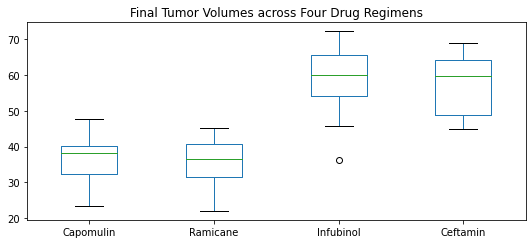

In [52]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Capomulin": cap_tumors, "Ramicane": ram_tumors, "Infubinol": inf_tumors, "Ceftamin": cef_tumors})

# Plot the dataframe
ax = data[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].plot(kind='box', title='Final Tumor Volumes across Four Drug Regimens')

# Display the plot
plt.show()

## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_df = mouse_study_cleaned.loc[mouse_study_cleaned['Mouse ID'].str.contains('v923')]
single_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
341,v923,Capomulin,Female,19,21,0,45.000000,0
342,v923,Capomulin,Female,19,21,5,45.704434,0
343,v923,Capomulin,Female,19,21,10,39.848223,0
344,v923,Capomulin,Female,19,21,15,40.457989,0
345,v923,Capomulin,Female,19,21,20,39.648296,0
346,v923,Capomulin,Female,19,21,25,40.156413,1
347,v923,Capomulin,Female,19,21,30,40.752216,2
348,v923,Capomulin,Female,19,21,35,41.439242,2
349,v923,Capomulin,Female,19,21,40,42.151015,2
350,v923,Capomulin,Female,19,21,45,40.658124,2


In [54]:
# arange(start, stop, step)
x_axis = np.arange(0, 50, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [64]:
# define variables for x and y axis
x_axis = single_mouse_df['Timepoint']
y_axis = single_mouse_df['Tumor Volume (mm3)']
y_axis

341    45.000000
342    45.704434
343    39.848223
344    40.457989
345    39.648296
346    40.156413
347    40.752216
348    41.439242
349    42.151015
350    40.658124
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Tumor Volume')

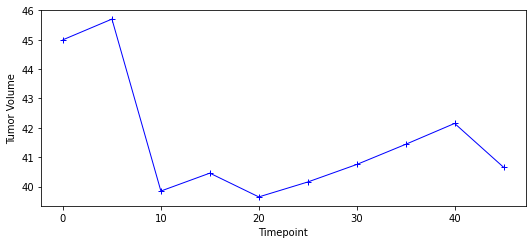

In [56]:
# select line data for Mouse ID v923
v923, = plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = single_mouse_df['Tumor Volume (mm3)']
y_axis = single_mouse_df['Weight (g)']

In [58]:
# The maximum x value for our chart will be 50
x_limit = 50

In [59]:
# List of values from 0 to 50 each value being 5 greater than the last
x_axis = np.arange(0, x_limit, 5)

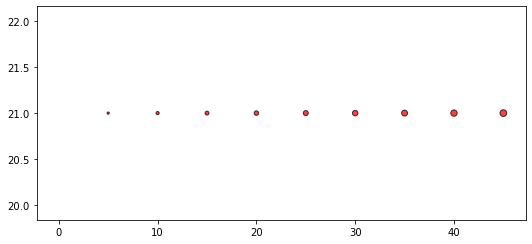

In [60]:
# generate scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = mouse_study_cleaned.loc[mouse_study_cleaned['Drug Regimen'].str.contains('Capomulin')]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [62]:
# find averages of each metric, grouped by Mouse IDs
capomulin_ave_df = capomulin_df.groupby('Mouse ID').mean()
capomulin_ave_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


The r-squared value is: 0.7088568047708717


C:\Users\cathy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


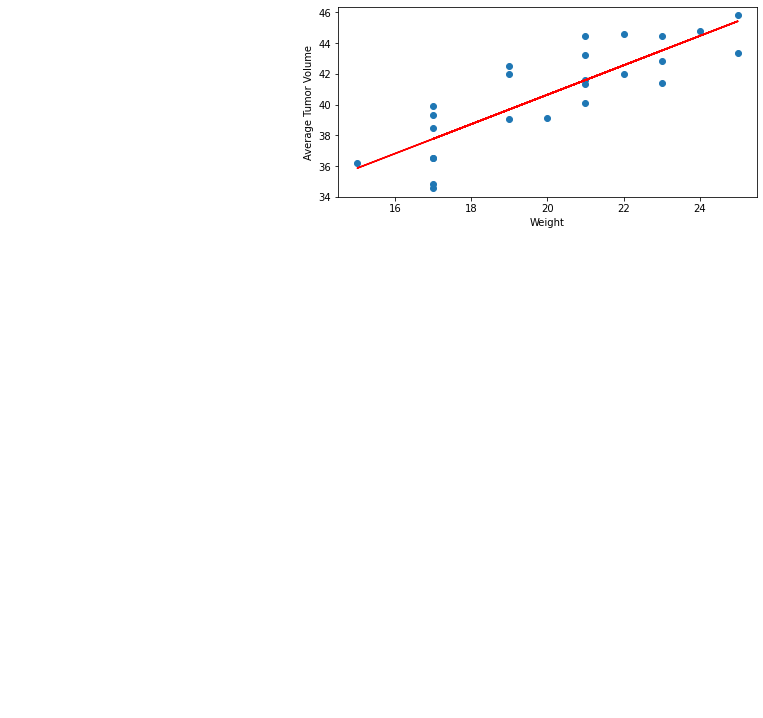

In [63]:
# Print out the r-squared value along with the plot.
x_values = capomulin_ave_df['Weight (g)']
y_values = capomulin_ave_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared value is: {rvalue**2}")
plt.show()